<a href="https://colab.research.google.com/github/aamnaakhtar/task2_thesparksfoundation/blob/main/Iris_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Presented by- Aamna Akhtar

#Task-2: Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# **Importing the libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing the dataset**

In [2]:
dataset = pd.read_csv('Iris.csv')
X = dataset.iloc[:, [1, 4]].values

# **Displaying the first five columns**

In [3]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Analysing the Dataset**

## Dropping the Id Column

In [4]:
dataset = dataset.drop(columns = ['Id'])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Displaying the Statistics related to the Dataset

In [5]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Displaying the Infomation about the Dataset

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Displaying the Number of Samples of each class

In [7]:
dataset['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

## Checking for Null Values

In [8]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since, there is no null value in the dataset, we do not need to work on processing / managing the null entries.

# **Using the elbow method to find the optimal number of clusters**

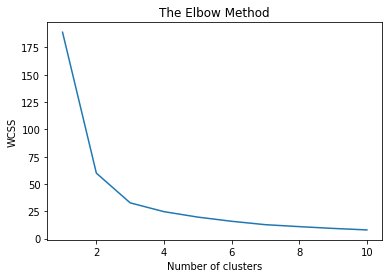

In [9]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Since, the Elbow Method is use to find the optimal number of clusters, it is when the Within Cluster Sum of Squares (WCSS) doesn't decrease significantly with every iteration, we get the desire value.
From the graph, it is obvious that the optimal number of clusters would be 3.

 **Optimal Number of Clusters = 3**

# **Training the K-Means model on the dataset**

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# **Visualisation**

# Visualising the Cluster using Sepal

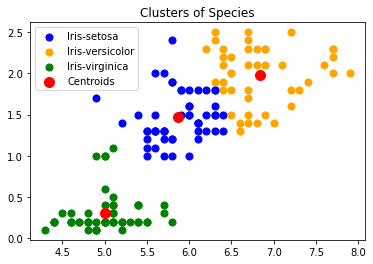

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'orange', label = 'Iris-versicolor')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.title('Clusters of Species')
plt.legend()
plt.show()

# Visualising each Attribute of the Dataset through Histogram

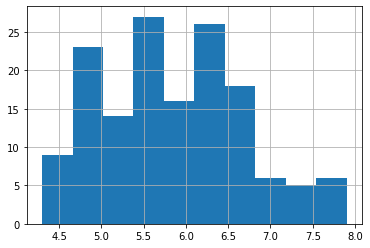

In [12]:
dataset['SepalLengthCm'].hist()

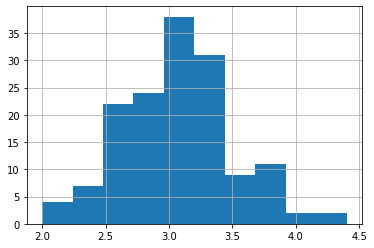

In [13]:
dataset['SepalWidthCm'].hist()

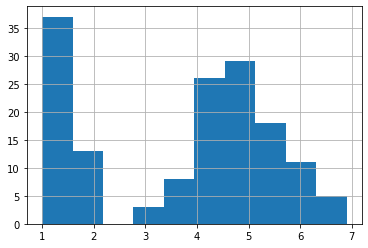

In [14]:
dataset['PetalLengthCm'].hist()

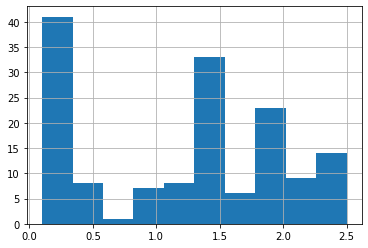

In [15]:
dataset['PetalWidthCm'].hist()

# Visualing the Cluster through Boxplot

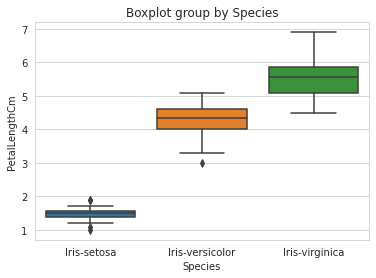

In [16]:
sns.set_style("whitegrid")
plt.title('Boxplot group by Species')
sns.boxplot(x ='Species', y ='PetalLengthCm', data = dataset)


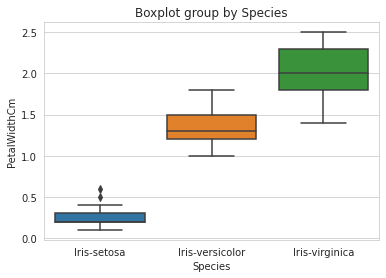

In [17]:
sns.set_style("whitegrid")
plt.title('Boxplot group by Species')
sns.boxplot(x ='Species', y ='PetalWidthCm', data = dataset)

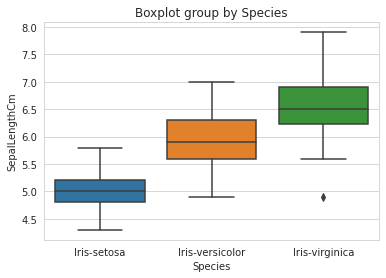

In [18]:
sns.set_style("whitegrid")
plt.title('Boxplot group by Species')
sns.boxplot(x ='Species', y ='SepalLengthCm', data = dataset)

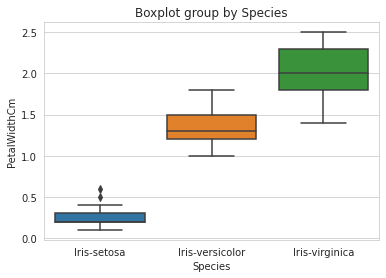

In [19]:
sns.set_style("whitegrid")
plt.title('Boxplot group by Species')
sns.boxplot(x ='Species', y ='PetalWidthCm', data = dataset)

# Thank you!